<a href="https://colab.research.google.com/github/zaku2590/finantext/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = '/content/'

user_df = pd.read_csv(path + "user.csv")
pop_df = pd.read_csv(path + "jinkou_doutai.csv")

display(user_df.shape[0])
display(pop_df.shape[0])
display(user_df.head())
display(pop_df.head())
display(user_df.isnull().sum())
display(pop_df.isnull().sum())

1000

26

,id,age,gender
0,0,64,2
1,1,54,1
2,2,79,2
3,3,59,1
4,4,44,1


,age,gender,population
0,24,1,321
1,29,1,328
2,34,1,333
3,39,1,372
4,44,1,411


,0
id,0
age,0
gender,0


,0
age,0
gender,0
population,0


In [47]:
# クレカユーザー構成比（age, genderごとの件数割合）
user_dist = user_df.groupby(['age', 'gender']).size().reset_index(name='count')
user_dist['ratio'] = user_dist['count'] / user_dist['count'].sum()

pop_df['population'] = pop_df['population'] * 10000

# user_df に登場する age, gender に絞る
target_pairs = user_dist[['age', 'gender']]
pop_df = pd.merge(pop_df, target_pairs, on=['age', 'gender'])

# 構成比（対象を限定したうえで）
pop_df['ratio'] = pop_df['population'] / pop_df['population'].sum()

# マージして比較用データフレームに
compare_df = pd.merge(user_dist, pop_df, on=['age', 'gender'], suffixes=('_user', '_pop'))

# 確認表示
display(compare_df)


,age,gender,count,ratio_user,population,ratio_pop
0,24,1,31,0.031,3210000,0.032572
1,24,2,42,0.042,3050000,0.030949
2,29,1,29,0.029,3280000,0.033283
3,29,2,23,0.023,3110000,0.031558
4,34,1,30,0.030,3330000,0.033790
5,34,2,33,0.033,3190000,0.032369
6,39,1,28,0.028,3720000,0.037747
7,39,2,31,0.031,3600000,0.036530
8,44,1,54,0.054,4110000,0.041705
9,44,2,49,0.049,3990000,0.040487


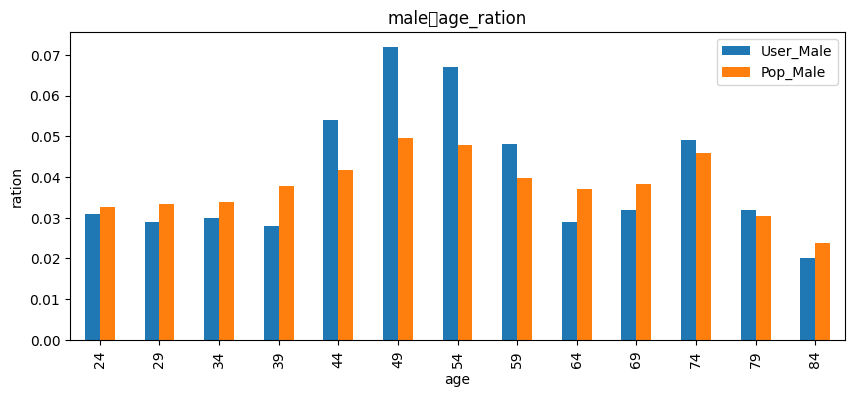

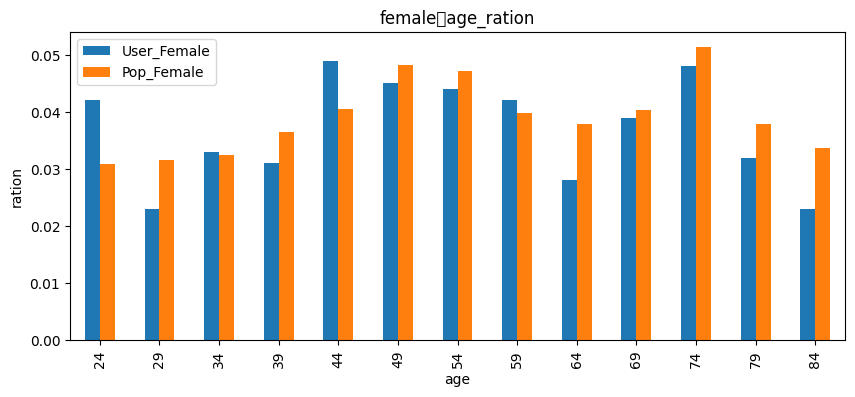

In [48]:
pivot_df = compare_df.pivot(index='age', columns='gender', values='ratio_user')
pivot_df.columns = ['User_Male', 'User_Female']
pivot_df['Pop_Male'] = compare_df[compare_df['gender'] == 1].set_index('age')['ratio_pop']
pivot_df['Pop_Female'] = compare_df[compare_df['gender'] == 2].set_index('age')['ratio_pop']
pivot_df = pivot_df.sort_index()

pivot_df[['User_Male', 'Pop_Male']].plot(kind='bar', figsize=(10, 4), title='male：age_ration')
plt.ylabel("ration")
plt.show()

pivot_df[['User_Female', 'Pop_Female']].plot(kind='bar', figsize=(10, 4), title='female：age_ration')
plt.ylabel("ration")
plt.show()